# 3.4 Cross prods


In [1]:
%load_ext autoreload
%autoreload 2
#from jupyterthemes import jtplot
#jtplot.style()

In [2]:
from ch03.draw3d import *
from ch03.colors import *
from ch03.vectors import *
from ch03.functions import  *

Exercise 3.22: What are the coordinates of the cross product of (1, -2, 1) and (-6, 12, -6)?

In [3]:
u = (1, -2, 1)
v = (-6, 12, -6)
print(cross(u, v))

(0, 0, 0)


## Drawing the octahedron

### The 6 vertices (corners)

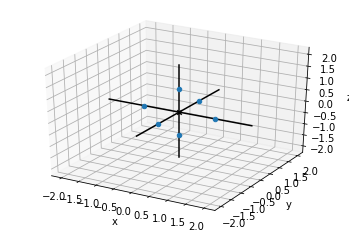

In [4]:
corners = [(1,0,0), (0,1,0), (0,0,1),
            (-1, 0, 0), (0, -1, 0), (0, 0, -1)]
draw3d(Points3D(*corners, color=blue))

### The edges

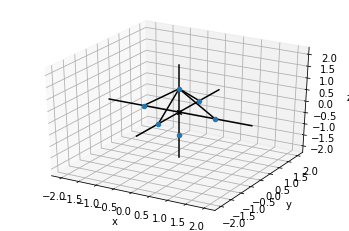

In [5]:
arrows = [Segment3D(c,(0,0,1), color=black) for c in corners if c != (0,0,-1)]
draw3d(
    Points3D(*corners, color=blue),
    *arrows
)

### Drawing the first triangle

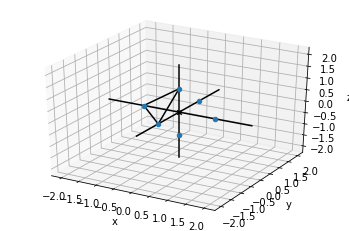

In [6]:
v1 = (0,0,1)
v2 = (-1, 0, 0)
v3 = (0, -1, 0)

triangle1 = (
    Segment3D(v1, v2, color = black),
    Segment3D(v1, v3, color = black),
    Segment3D(v2, v3, color=black),
)

draw3d(
    Points3D(*corners, color=blue),
    *triangle1
)

In [7]:
octahedron = [
[(1,0,0), (0,1,0), (0,0,1)],
[(1,0,0), (0,0,-1), (0,1,0)],
[(1,0,0), (0,0,1), (0,-1,0)],
[(1,0,0), (0,-1,0), (0,0,-1)],
[(-1,0,0), (0,0,1), (0,1,0)],
[(-1,0,0), (0,1,0), (0,0,-1)],
[(-1,0,0), (0,-1,0), (0,0,1)],
[(-1,0,0), (0,0,-1), (0,-1,0)],
]

def vertices(faces):
    return list( set( [v for face in faces for v in face] ) )

for v in vertices(octahedron):
    print(v)

(0, 1, 0)
(0, -1, 0)
(1, 0, 0)
(-1, 0, 0)
(0, 0, -1)
(0, 0, 1)


In [8]:
def component(v, direction):
    return ( dot(v, direction) / length(direction) )

print(component((1,2,3), (1, 0, 0)))


def vector_to_2d(v):
    x = component(v, (1, 0, 0))
    y = component(v, (0, 1, 0))
    return x, y

for v in vertices(octahedron):
    print("original: %s, 2d: %s" % ( str(v), str(vector_to_2d(v)) ))

def face_to_2d(face):
    return [vector_to_2d(v) for v in face]


for face in octahedron:
    print("orig: %s, 2d: %s" % (str(face), str(face_to_2d(face))))

1.0
original: (0, 1, 0), 2d: (0.0, 1.0)
original: (0, -1, 0), 2d: (0.0, -1.0)
original: (1, 0, 0), 2d: (1.0, 0.0)
original: (-1, 0, 0), 2d: (-1.0, 0.0)
original: (0, 0, -1), 2d: (0.0, 0.0)
original: (0, 0, 1), 2d: (0.0, 0.0)
orig: [(1, 0, 0), (0, 1, 0), (0, 0, 1)], 2d: [(1.0, 0.0), (0.0, 1.0), (0.0, 0.0)]
orig: [(1, 0, 0), (0, 0, -1), (0, 1, 0)], 2d: [(1.0, 0.0), (0.0, 0.0), (0.0, 1.0)]
orig: [(1, 0, 0), (0, 0, 1), (0, -1, 0)], 2d: [(1.0, 0.0), (0.0, 0.0), (0.0, -1.0)]
orig: [(1, 0, 0), (0, -1, 0), (0, 0, -1)], 2d: [(1.0, 0.0), (0.0, -1.0), (0.0, 0.0)]
orig: [(-1, 0, 0), (0, 0, 1), (0, 1, 0)], 2d: [(-1.0, 0.0), (0.0, 0.0), (0.0, 1.0)]
orig: [(-1, 0, 0), (0, 1, 0), (0, 0, -1)], 2d: [(-1.0, 0.0), (0.0, 1.0), (0.0, 0.0)]
orig: [(-1, 0, 0), (0, -1, 0), (0, 0, 1)], 2d: [(-1.0, 0.0), (0.0, -1.0), (0.0, 0.0)]
orig: [(-1, 0, 0), (0, 0, -1), (0, -1, 0)], 2d: [(-1.0, 0.0), (0.0, 0.0), (0.0, -1.0)]


In [9]:
# Returns the same vector but with length 1:
def unit(v):
    toDivideBy = 1 / length(v)
    return scale(toDivideBy, v)

print(unit((0,0,5)))

(0.0, 0.0, 1.0)


In [10]:
def normal(face):
    return(cross(subtract(face[ 1 ], face[ 0 ]), subtract(face[ 2 ], face[ 0 ])))


print(octahedron[0])
print(normal(octahedron[0]))

[(1, 0, 0), (0, 1, 0), (0, 0, 1)]
(1, 1, 1)


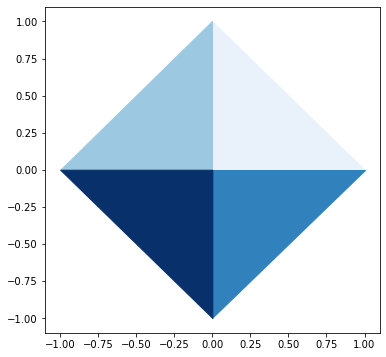

In [19]:
from ch03.draw2d import  *
blues = matplotlib.cm.get_cmap('Blues')
# 1 = very bright, 0 = very dark, i think

def render(faces, light = (1, 2, 3), color_map = blues, lines = None):
    polygons = []
    lightUnit = unit(light)
    for face in faces:

        faceNormal = unit(normal(face))
        if (faceNormal[2] > 0):
            lightAlignment = dot(faceNormal, lightUnit)
            c = color_map( 1 - lightAlignment)
            #print(1 - dot(unit(normal(face)), unit(light)))

            face2dVecs = face_to_2d(face)

            p = Polygon2D(*face2dVecs, fill=c, color=lines)
            polygons.append(p)

    draw2d(*polygons, origin=False, axes=False, grid=None)

render(octahedron)